In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib.rcParams['figure.facecolor']='whitesmoke'
%matplotlib.rcParams['font.size']=14

UsageError: Line magic function `%matplotlib.rcParams['figure.facecolor']='whitesmoke'` not found.


The goal of this project is to find out which are the most relevant features 
that students take into account to choose the favorite university. 
Some of the essential questions for developing this project are related to the 
number of applications, admissions, and enrollments, cost of tuition and fees, 
cost of living on campus, types of degrees offered, and features of the states 
where universities are located (population and GDP).


Answer the following hypotheses and questions:

- Do universities with a high number of applications are the preferred ones by students? 
in other words, could the number of applications tell us that a university is one of the most preferred by students?
- Do students prefer universities that have a high rate of admission? 
in other words, do students prefer a university where it is easier for them to be admitted?.
- Do students prefer public or private universities?
- Do students prefer universities with low tuition and fees?
- Do students prefer a university for its low on-campus cost of living?
- Do students prefer universities from highly populated states?
- Do students prefer a university because it belongs to a state with a high GDP per capita?
- Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

https://blog.jovian.com/what-makes-a-student-prefer-a-university-part-i-data-preparation-f581b699dcab
\
https://www.kaggle.com/code/akershishukla/eda-students-university-preference

More ideas:
https://www.coursera.org/articles/data-analytics-projects-for-beginners

In [3]:
# definimos el path

df = pd.read_excel('IPEDS_data.xlsx')

# shape
df.shape

(1534, 145)

1534 filas, 145 columnas

In [4]:
# check first elements of the dataset
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [5]:
# para poder ver el nombre de todas las columnas
df.columns.values 

array(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       'Offers One but less than two years certificate',
       "Offers Associate's degree",
       'Offers Two but less than 4 years certificate',
       "Offers Bachelor's degree", 'Offers Postbaccalaureate certificate',
       "Offers Master's degree", "Offers Post-master's certificate",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice",
       "Offers Doctor's degree - other", 'Offers Other degree',
       'Applicants total', 'Admissions total', 'Enrolled total',
       'Percent of freshmen submitting SAT scores',
       'Percent of freshmen submitting ACT scores',
       'SAT Critical Reading 25th percentile score',
       'SAT Critical Reading 75th percentile score',
       

In [6]:
# Cleaning data
# check missing values > 20%

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = percent[percent >= 0.20].sort_values(ascending=False)  # solo las variables que tengan mas del 20% faltante
print('Variables con más del 20% de datos faltantes (Percentil)\n')
missing_data

Variables con más del 20% de datos faltantes (Percentil)



Endowment assets (year end) per FTE enrollment (GASB)       0.663625
SAT Writing 75th percentile score                           0.534550
SAT Writing 25th percentile score                           0.534550
Number of first-time undergraduates - in-state              0.406128
Percent of first-time undergraduates - foreign countries    0.406128
Number of first-time undergraduates - residence unknown     0.406128
Percent of first-time undergraduates - residence unknown    0.406128
Percent of first-time undergraduates - in-state             0.406128
Number of first-time undergraduates - out-of-state          0.406128
Percent of first-time undergraduates - out-of-state         0.406128
Number of first-time undergraduates - foreign countries     0.406128
Endowment assets (year end) per FTE enrollment (FASB)       0.374185
SAT Critical Reading 75th percentile score                  0.237940
SAT Critical Reading 25th percentile score                  0.237940
SAT Math 75th percentile score    

Las filas anteriormente listadas serán eliminadas puesto que no pueden ser utilizadas como valores representativos. Se hará una copia

In [7]:
# getting all columns to be removed
to_be_dropped = df.isna().sum()[df.isna().sum()>=(0.2*len(df))].index.values
df.drop(to_be_dropped, axis = 1, inplace = True)
df.shape

(1534, 127)

Para acotar el estudio, se van a seleccionar las variables que van a tener mayor impacto

In [8]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

df = df[interesting_columns]


In [9]:
df.head

<bound method NDFrame.head of                                                Name  year  \
0                          Alabama A & M University  2013   
1               University of Alabama at Birmingham  2013   
2                                Amridge University  2013   
3               University of Alabama in Huntsville  2013   
4                          Alabama State University  2013   
...                                             ...   ...   
1529   University of South Florida-Sarasota-Manatee  2013   
1530                           The Kingâ€™s College  2013   
1531                       Ottawa University-Online  2013   
1532                   Providence Christian College  2013   
1533  Polytechnic University of Puerto Rico-Orlando  2013   

                                 Highest degree offered  \
0                Doctor's degree - research/scholarship   
1     Doctor's degree - research/scholarship and pro...   
2     Doctor's degree - research/scholarship and pro...   
3

Quedan todavía algunas filas con valores nulos que van a ser removidos

In [10]:
var = df[df['Total  enrollment'].isna()]
var

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
257,University of North Georgia,2013,Doctor's degree - professional practice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,2013,Doctor's degree - research/scholarship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.drop([257, 1308], axis=0, inplace=True)

Chequearemos si existen valores inconsistentes

In [12]:
df.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,...,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,...,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,...,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,...,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,...,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,...,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Según el describe del dataset, hay algunas universidades en donde, por ejemplo, tuvieron 0 applications en total, 0 admissions y 0 enrollments. En el caso específico del dataset, puede ser debido a que la información en ese momento no haya estado disponible y no significa que las inscripciones hayan sido nulas. Por eso en vez de eliminar los datos, sería idóneo reemplazarlos por NaN.
Los datos se deben manejar debido a que, dada la naturaleza de las variables estudiadas, el 0 significa **ausencia** de la variable estudiada y no tiene un significado relevante para el estudio (como si lo tendría en caso de ser una escala de razón).

In [13]:
# replacing 0 values with NaN so it doesnt affect measurements
df.replace(0, np.nan, inplace=True)

In [14]:
# Replacing extra spaces and chars
col = []
for ele in df.columns:
    for char in [" - ", "-","  ","/"," "]:
        if char in ele:
            ele = ele.replace(char,"_")
    col.append(ele)

# Removing special characters
clean_col = []
for ele in col:
    ele = ele.casefold()
    for char in [",", "'","-"]:
        if char in ele:
            ele = ele.replace(char,"")
    clean_col.append(ele)
df.columns = clean_col

# state_abbreviation can be replaced by 'state' for ease
df.rename(columns={'state_abbreviation':'state'}, inplace = True)

df.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state', 'control_of_institution', 'total_enrollment',
       'full_time_enrollment', 'part_time_enrollment',
       'undergraduate_enrollment', 'graduate_enrollment',
       'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_bachelor_degree_within_4_years_total',
       'graduation_rat

## Estudios Exploratorios y Visualización de Datos

Este análisis nos ayudará a a entender cómo interactúan las variables entre sí y nos servirá para formular hipótesis para cumplir los objetivos deseados.


In [15]:
df.describe()

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total_enrollment,full_time_enrollment,...,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1532.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,...,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,...,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,...,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,...,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,...,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,...,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,...,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [16]:
# Para visualizar las universidades con mayores applications

highest = df[['name', 'applicants_total']].sort_values(by='applicants_total', ascending=False).head(20)
highest

,name,applicants_total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


Para dejarlo en un barplot (gráfico de barra)

c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Number of applicants')

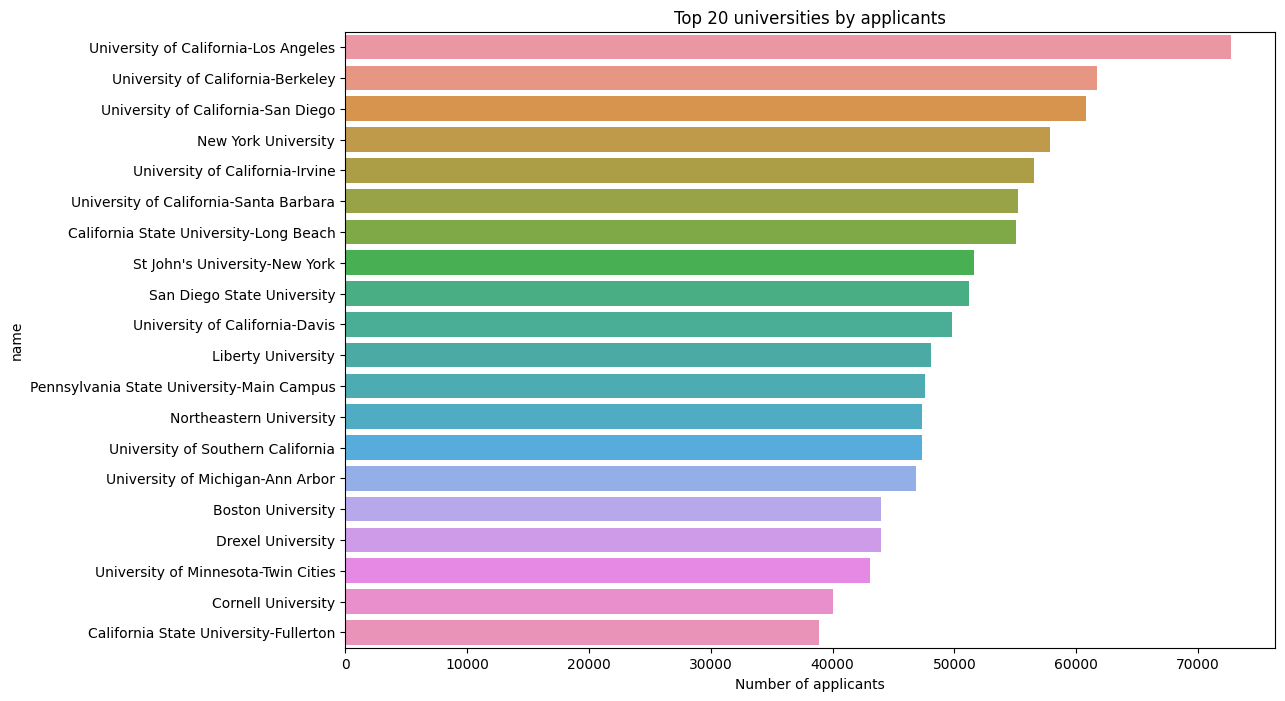

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='applicants_total', y='name', data=highest)
plt.title('Top 20 universities by applicants')
plt.xlabel('Number of applicants')

Podríamos suponer que las universidades con mayor cantidad de applicants son las más preferidas entre los estudiantes, aunque muchos estudiantes mandan más de una solicitud, y obviamente no puede haber más de una preferida. Vamos a inspeccionar las relaciones entre el número de admisiones (admissions) y aceptados (enrollments).

c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\D

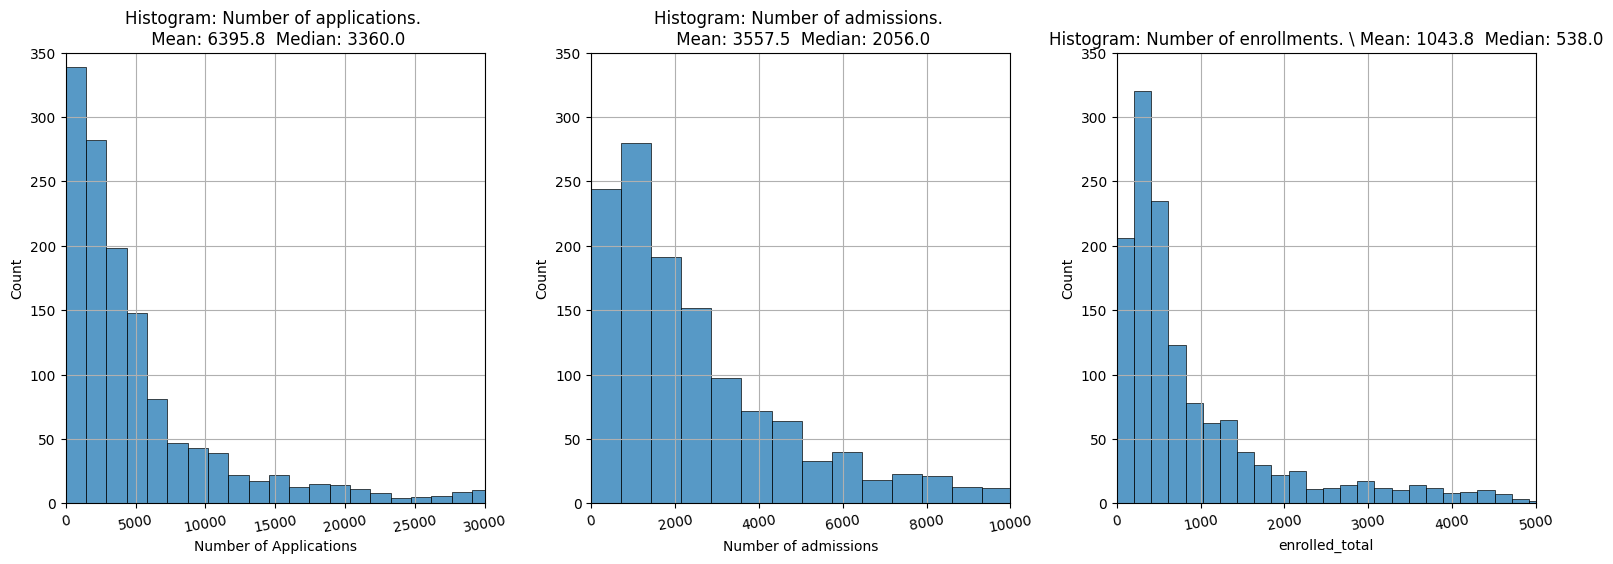

In [18]:
# histograma combinado en un solo cuadro

#applicants_total
plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
sns.histplot(df['applicants_total'], bins=50) # df['applicants_total']
plt.title(f"Histogram: Number of applications. \n Mean: {df['applicants_total'].mean():.1f}  Median: {df['applicants_total'].median():.1f}")
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

# admissions total
plt.subplot(1, 3, 2) # min, max, position
sns.histplot(df['admissions_total'], bins=50)
plt.title(f"Histogram: Number of admissions. \n Mean: {df['admissions_total'].mean():.1f}  Median: {df['admissions_total'].median():.1f}")  # :.1f -> format to 1 decimal
plt.xlabel('Number of admissions')
plt.axis([0, 10000, 0, 350])
plt.xticks(rotation=10)
plt.grid()

# enrollments total
plt.subplot(1, 3, 3)
sns.histplot(df['enrolled_total'], bins=50)
plt.title(f"Histogram: Number of enrollments. \ Mean: {df['enrolled_total'].mean():.1f}  Median: {df['enrolled_total'].median():.1f}")
plt.axis([0, 5000, 0, 350])
plt.xticks(rotation=10)
plt.grid()
plt.tight_layout(pad=2)

Como se puede ver, todas las variables presentan una **asimetría derecha o positiva** puesto que la mediana es menor a la media aritmética. A su vez se puede apreciar una situación: Las universidades reciben muchísimas más solicitudes (applicants) que aquellos que finalmente terminan siendo aceptados (admissions). Esto nos dirige a la siguiente pregunta: Si en una universidad el ratio admissions/applicants es más bajo (lo cual significa que hay menos posibilidades de ser aceptado), ¿afecta las preferencias de los estudiantes? Dicho de otro modo, los estudiantes ¿prefieren a las universidades con un mayor grado de admissions?
En el caso de las inscripciones (enrollments) respecto a la baja se puede argumentar que es una práctica común entre los estudiantes estadounidenses el mandar solicitudes a muchas instituciones a la vez, esperando ser aceptados en su universidad preferida.

Por ahora, tenemos dos preguntas íntimamente relacionadas:
- ¿Los estudiantes prefieren las universidades con mayor grado de aceptación?
- ¿Puede el número de applicants decirnos algo sobre la preferencia estudiantil?

Vamos a ver un diagrama de dispersión (scatterplot) entre applicants y admissions, y otro respecto a admissions y enrollments

c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\E

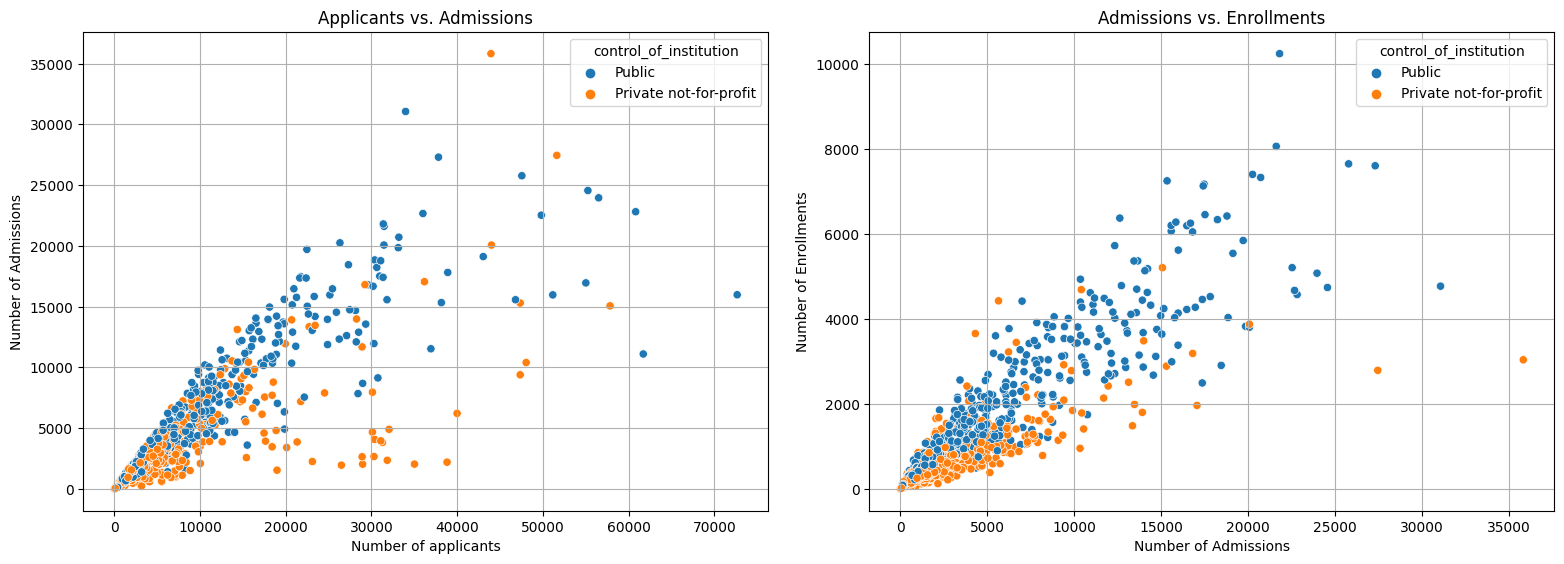

In [19]:
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.title('Applicants vs. Admissions')
sns.scatterplot(y=df['admissions_total'], x=df['applicants_total'], hue=df['control_of_institution'])
plt.ylabel('Number of Admissions')
plt.xlabel('Number of applicants')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Admissions vs. Enrollments')
sns.scatterplot(y=df['enrolled_total'], x=df['admissions_total'], hue=df['control_of_institution'])
plt.xlabel('Number of Admissions')
plt.ylabel('Number of Enrollments')
plt.grid()

plt.tight_layout(pad=2)



Parece existir una relación lineal directa entre cantidad de applicants y admissions (salvo algunas excepciones), lo que significa que universidades con muchas applicants conllevan a que tengan muchas admissions. Se da el caso de que las universidades con más applicants no son las que más admissions tienen. \
Como el caso de las applicants puede ser variado debido a las prácticas de inscripción, se van a tener en cuenta dos variables combinadas.
Por un lado el **acceptance_rate**, siendo el porcentaje de admitidos sobre total de applicants. Y por otro el **enrollment_rate**, definido como cantidad de enrollments sobre total de admissions.

In [21]:
df['acceptance_rate'] = round((df['admissions_total']/df['applicants_total'])*100, 2)
df['enrollment_rate'] = round((df['enrolled_total']/df['admissions_total'])*100, 2)
df[['name', 'acceptance_rate']].sort_values(by='acceptance_rate', ascending=False)

,name,acceptance_rate
451,University of Pikeville,100.0
633,Metropolitan State University,100.0
1479,Brandman University,100.0
95,Coleman University,100.0
1343,Goddard College,100.0
...,...,...
1526,University of the West,NaN
1527,Averett University-Non-Traditional Programs,NaN
1528,LIU Riverhead,NaN
1531,Ottawa University-Online,NaN


Vamos a relacionar la cantidad de applicants con enrollment_rate, recién creada, en un nuevo scatterplot

c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Enrollment Rate')

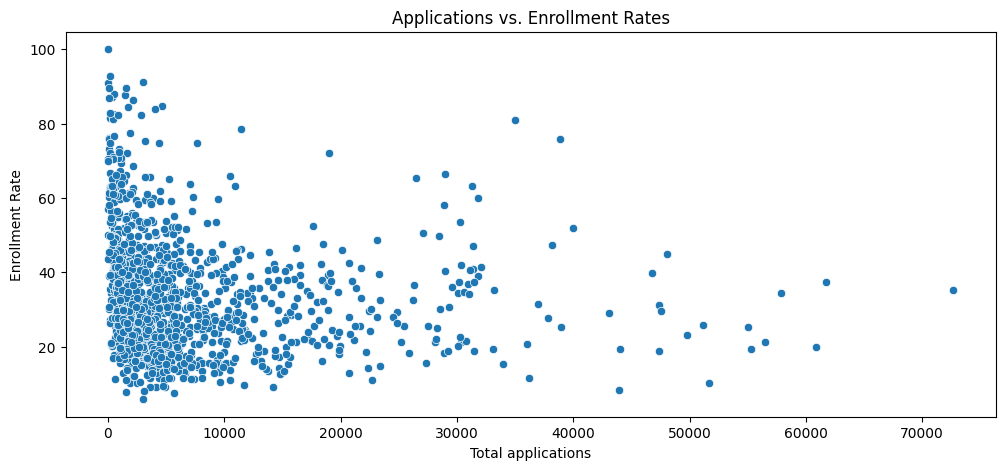

In [25]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['applicants_total'], y=df['enrollment_rate']) # sns.scatterplot(x='applicants_total',y='enrollment_rate',data=df)
plt.title('Applications vs. Enrollment Rates')
plt.xlabel('Total applications')
plt.ylabel('Enrollment Rate')

Como se puede notar, hay una clara tendencia (relación lineal inversa) de que las universidades que tienen menos applications terminan con un mayor porcentaje de enrollments en comparación a sus aplicantes. Podemos afirmar con claridad que **un gran número de aplicaciones no significa que la universidad sea más preferente**.

Consideremos ahora las admissions aceptadas (acceptance_rate) y las inscripciones finales (enrollment_rate)

c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\E

Text(0.5, 1.0, 'Acceptance Rate vs. Enrollment Rate')

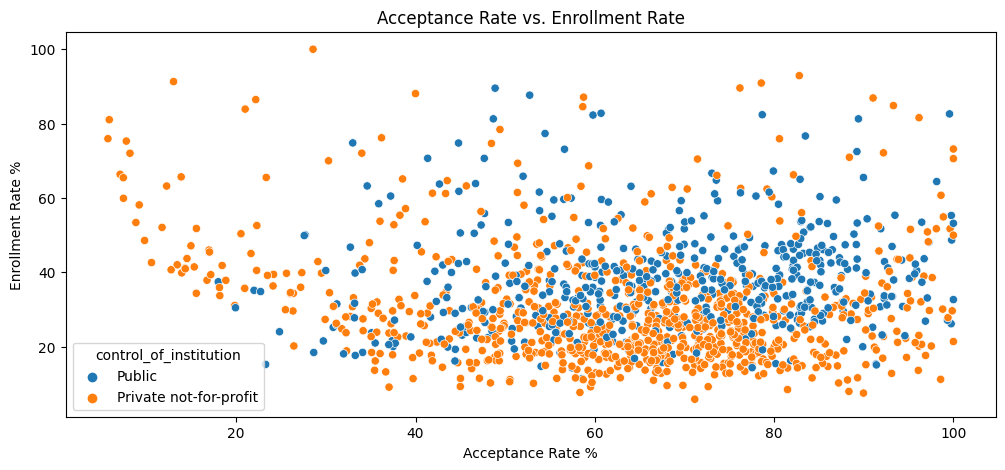

In [27]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['acceptance_rate'], y=df['enrollment_rate'], hue=df['control_of_institution'])
plt.xlabel('Acceptance Rate %')
plt.ylabel('Enrollment Rate %')
plt.title('Acceptance Rate vs. Enrollment Rate')

Se puede afiramr que a medida que sube el acceptance_rate (admissions) los datos de inscripción (enrollments) se vuelven más difusos. Aunque parece haber una relación lineal inversa en las universidades privadas (naranja) con niveles de admissions <20%. Esto nos lleva a pensar que los niveles de admisiones no son una variable muy influyente sobre los estudiantes. Como conclusión general, **los estudiantes no necesariamente prefieren universidades basándose en el criterio de probabilidad de ser admitidos ni por su facilidad de inscribirse.**

A su vez, es interesante apuntar que las universidades con acceptance_rates más bajos son, en su mayoría **privadas** y, aunque es más dificil ser aceptado en estas instituciones, al conseguirlo los estudiantes se inscriben directamente.

Listemos las 25 universidades que más y menos acceptance_rate tengan:


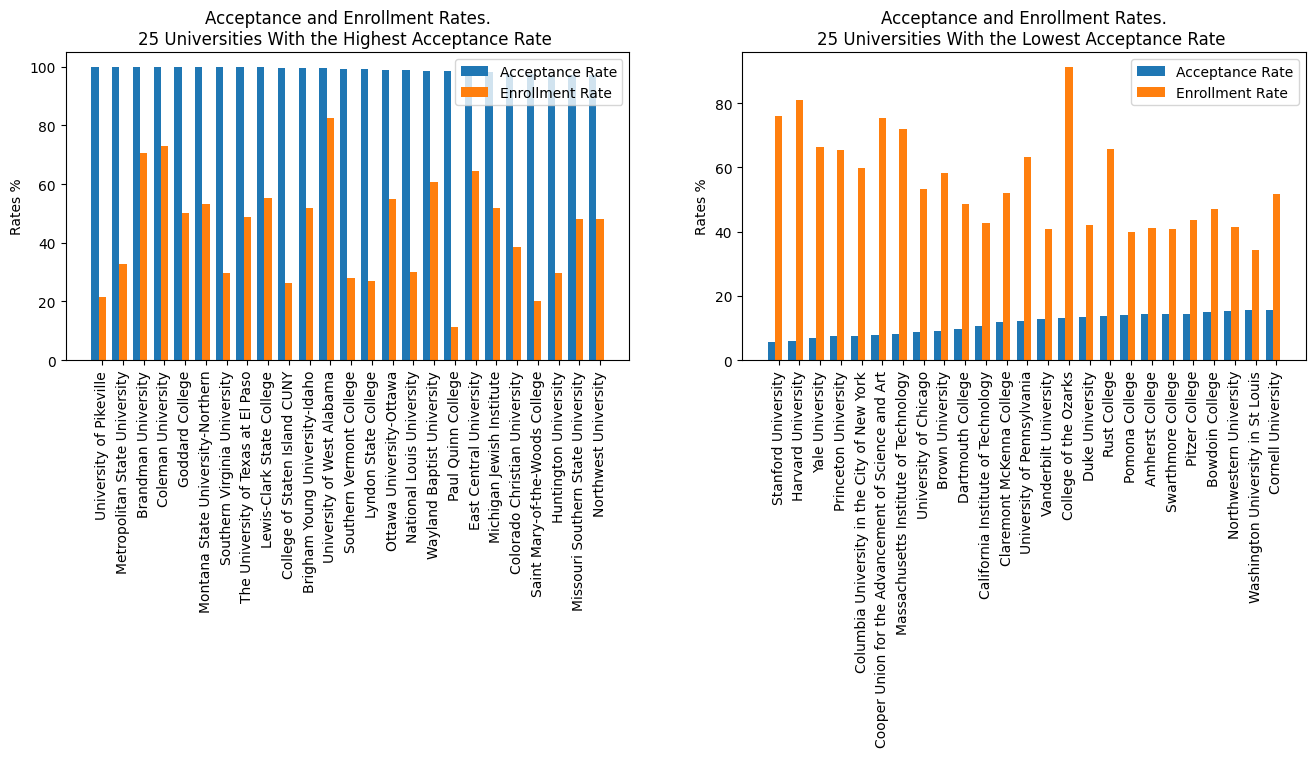

In [45]:
high_accept = df[df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending = False).head(25)
low_accept = df[df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending = True).head(25)

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
ind = np.arange(len(high_accept)) #number of universities
width = 0.35       #space

plt.bar(ind, high_accept.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, high_accept.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width, high_accept.name.values, rotation=90 )
plt.legend(loc='best')

plt.subplot(1,2,2)
ind = np.arange(len(low_accept)) #number of universities
width = 0.35       #space
plt.bar(ind, low_accept.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, low_accept.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width, low_accept.name.values, rotation=90 )
plt.legend(loc='best')

Con este último barplot queda verificado que a mayor acceptance_rate, más dispersos son los datos de enrollment_rate. Y en los casos en las que son dificiles de entrar, los enrollments superan ampliamente a las admissions.
Llegamos a la conclusión de que los estudiantes no tienen preferencia por la dificultad de inscripción. \
Entonces analicemos otra pregunta: **¿Públicas o Privadas?**

In [46]:
# dividir la cantidad de applications en privadas y públicas

private_uni = df[df['control_of_institution'] == 'Private not-for-profit']
private_uni = private_uni[private_uni['applicants_total'].notnull()]
print(f'Private: {len(private_uni)}')

public_uni = df[df['control_of_institution'] == 'Public ']
public_uni = df[df['applicants_total'].notnull()]
print(f'Public: {len(public_uni)}')

Private: 868
Public: 1376


c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


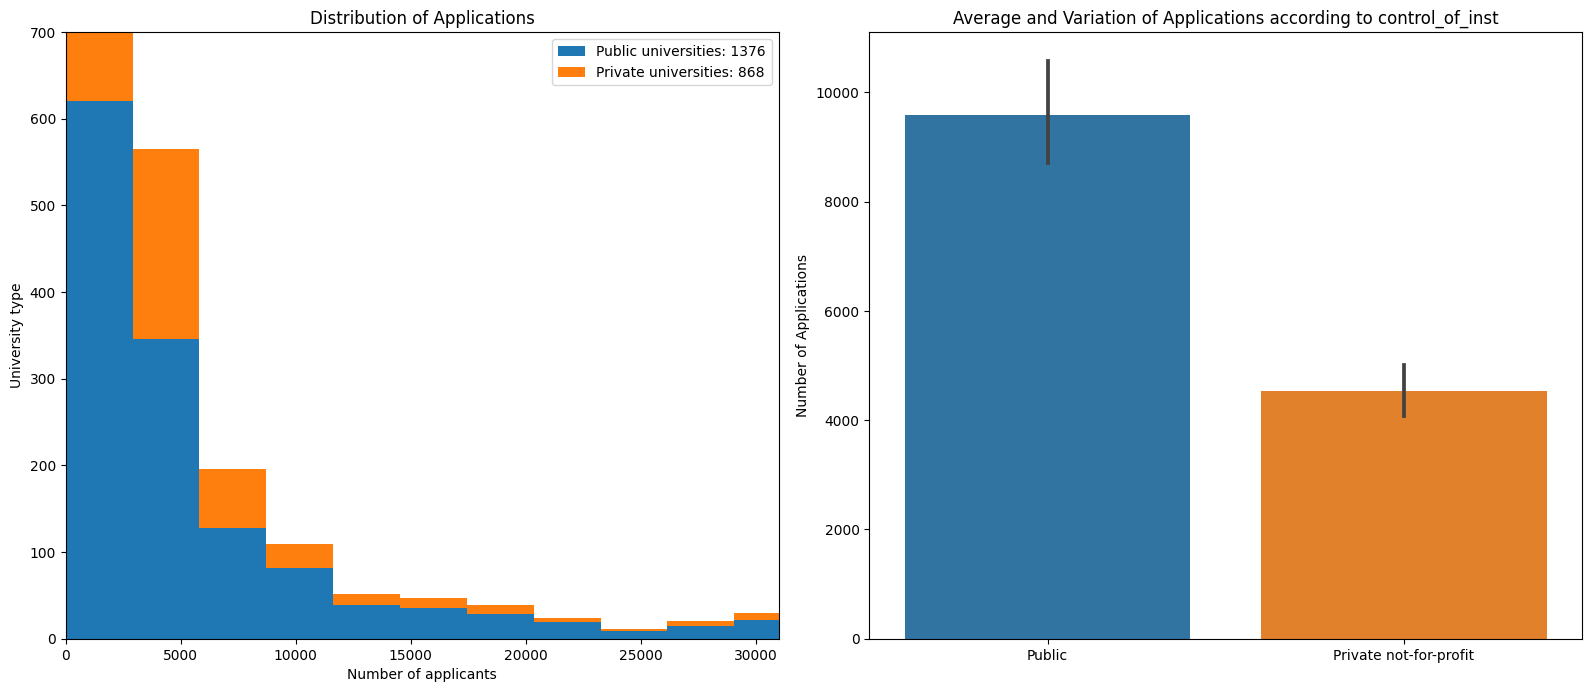

In [50]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.hist([public_uni['applicants_total'], private_uni['applicants_total']], stacked=True, bins=25)
plt.axis([0, 31000, 0, 700])
plt.title('Distribution of Applications')
plt.xlabel('Number of applicants')
plt.ylabel('University type')
plt.legend([f'Public universities: {len(public_uni)}',f'Private universities: {len(private_uni)}'])

plt.subplot(1, 2, 2)
sns.barplot(x=df['control_of_institution'], y=df['applicants_total'])
plt.title('Average and Variation of Applications according to control_of_inst')
plt.xlabel('')
plt.ylabel('Number of Applications')
plt.tight_layout(pad=1)

Además, podríamos pensar en que existe una relación entre enrollment_rate y la inclinación por universidades públicas o privadas. De esta manera, partiendo de enrollment_rate como factor de preferencia, las conclusiones pueden ser más significativas.

c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\E

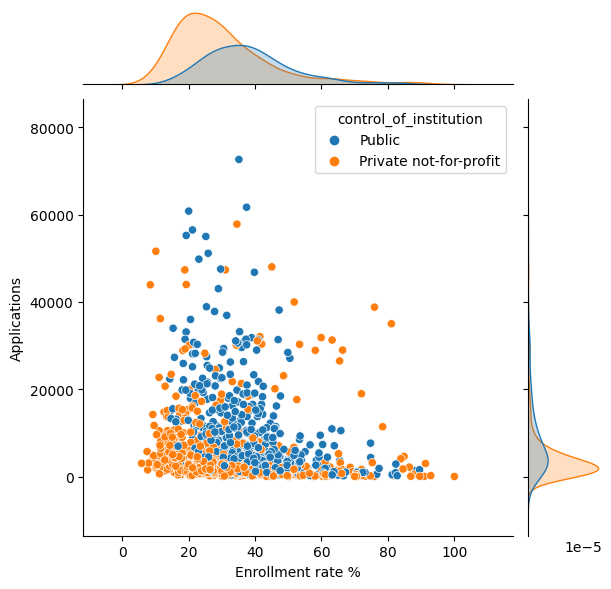

In [51]:
g = sns.jointplot(x=df['enrollment_rate'], y=df['applicants_total'], hue=df['control_of_institution'], height=6)
g = (g.set_axis_labels('Enrollment rate %', 'Applications'))

Analizando el gráfico planteado, podemos concluir que, en promedio, el enrollment_rate es mayor en las universidades públicas. Por lo tanto, y teniendo en cuenta éste como criterio de referencia, podemos inferir que **hay una preferencia estudiantil por las universidades públicas**.

A partir de este axioma, podemos preguntar:
- **¿Los estudiantes prefieren universidades con matrículas y tarifas bajas?**

c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\E

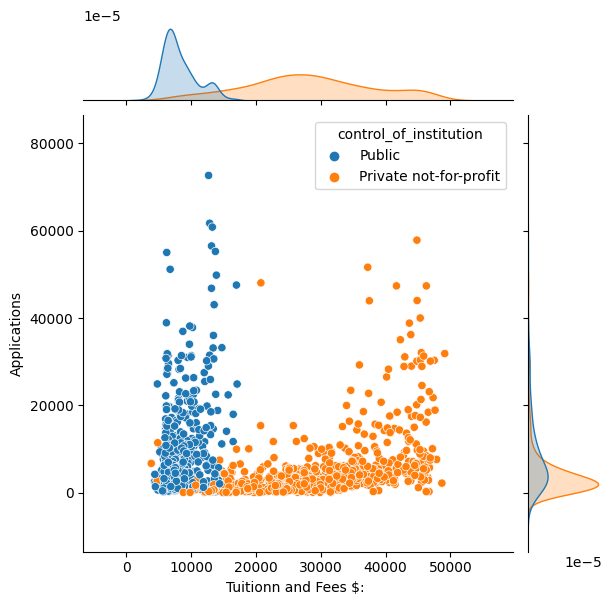

In [52]:
# Se utiliza la columna tuition_and_fees_2013_14

g = sns.jointplot(x=df['tuition_and_fees_2013_14'], y=df['applicants_total'], hue=df['control_of_institution'])
g = (g.set_axis_labels('Tuitionn and Fees $: ', 'Applications'))

Con lo expuesto hasta ahora, podemos notar que las universidades mas 'baratas' tienen más applicants. Esto podría hacernos pensar que puede haber una relación entre costo de matrícula y las preferencias de los estudiantes, pero para poder concluir esto fehacientemente, necesitamos hacer un joinplot con tuitons_and_fees y enrollment_rate (inscripciones realizadas)

c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\E

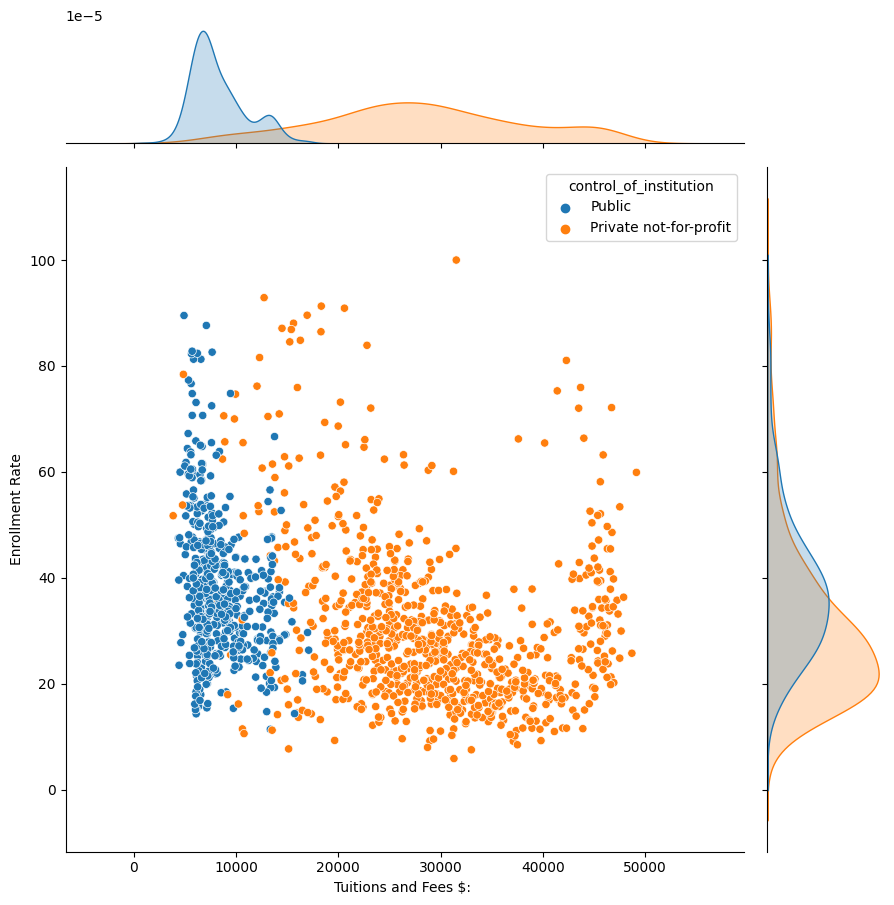

In [55]:
g = sns.jointplot(x=df['tuition_and_fees_2013_14'], y=df['enrollment_rate'], hue=df['control_of_institution'], height=9)
g = (g.set_axis_labels('Tuitions and Fees $: ', 'Enrollment Rate'))


Este gráfico refleja dos ideas principales: 
- Las Universidades Públicas son menos costosas que las Privadas
- Existe una gran concentración del medio hacia la izquierda del eje x. Dicho de otro modo, las universidades menos costosas tienen mayores porcentajes de inscripción.

Teniendo esto en cuenta, concluímos que los estudiantes **prefieren universidades baratas** y que los estudiantes **prefieren las universidades públicas** porque, en efecto, son más baratas.

La siguiente pregunta es referida al costo de vida universitario:

- **¿Los estudiantes tienen una preferencia hacia al bajo costo de vivir en un campus?** 

Algunas personas eligen no vivir en el campus porque les da ciertos beneficios, mientras otras simplemente no eligen una universidad porque residir en el campus es barato. Esto **debería** estar contemplado en el dataset, pero al no estarlo tendremos como **principal assumption que la mayoría de los estudiantes buscan vivir en el campus**.

El dataset presenta dos columnas referidas al costo de vida en el campus. Una para estudiantes que residen en el estado, y otra para aquellos con domicilio real en otra jurisdicción. Por lo que para empezar en análisis, es necesario trabajar con ellas por separado.


c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\E

Text(0, 0.5, 'Enrollment Rate')

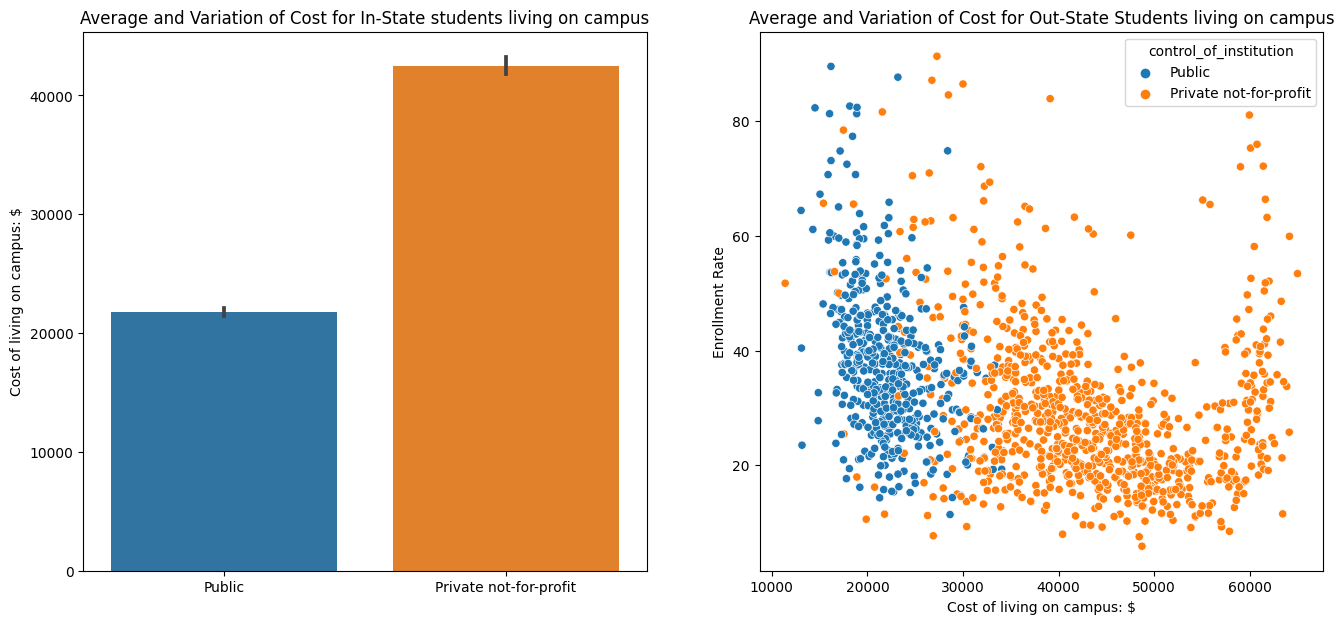

In [62]:
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
sns.barplot(y=df['total_price_for_in_state_students_living_on_campus_2013_14'], x=df['control_of_institution'])
plt.title('Average and Variation of Cost for In-State students living on campus')
plt.xlabel('')
plt.ylabel('Cost of living on campus: $')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['total_price_for_in_state_students_living_on_campus_2013_14'], y=df['enrollment_rate'], hue=df['control_of_institution'])
plt.title('Average and Variation of Cost for Out-State Students living on campus')
plt.xlabel('Cost of living on campus: $')
plt.ylabel('Enrollment Rate')

Reflexiones:
- Podemos concluir que la mayoría de las universidades públicas son mucho más pagables para los estudiantes que viven en el mismo estado, comparado con las universidades privadas. (Un 50% menos)
- El gráfico derecho muestra que las confirmaciones de las inscripciones (enrollments) son más frecuentes cuando el costo de vida del campus es más bajo. Por ende, estamos en condiciones de afirmar que **en el caso de los estudiantes del mismo estado, es un factor de preferencia el costo de vida más bajo**.

Analicemos ahora a los estudiantes de otra jurisdicción

c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\Exploratory Data Analysis - American Universities IPEDS 2013\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\usuario\Desktop\a\E

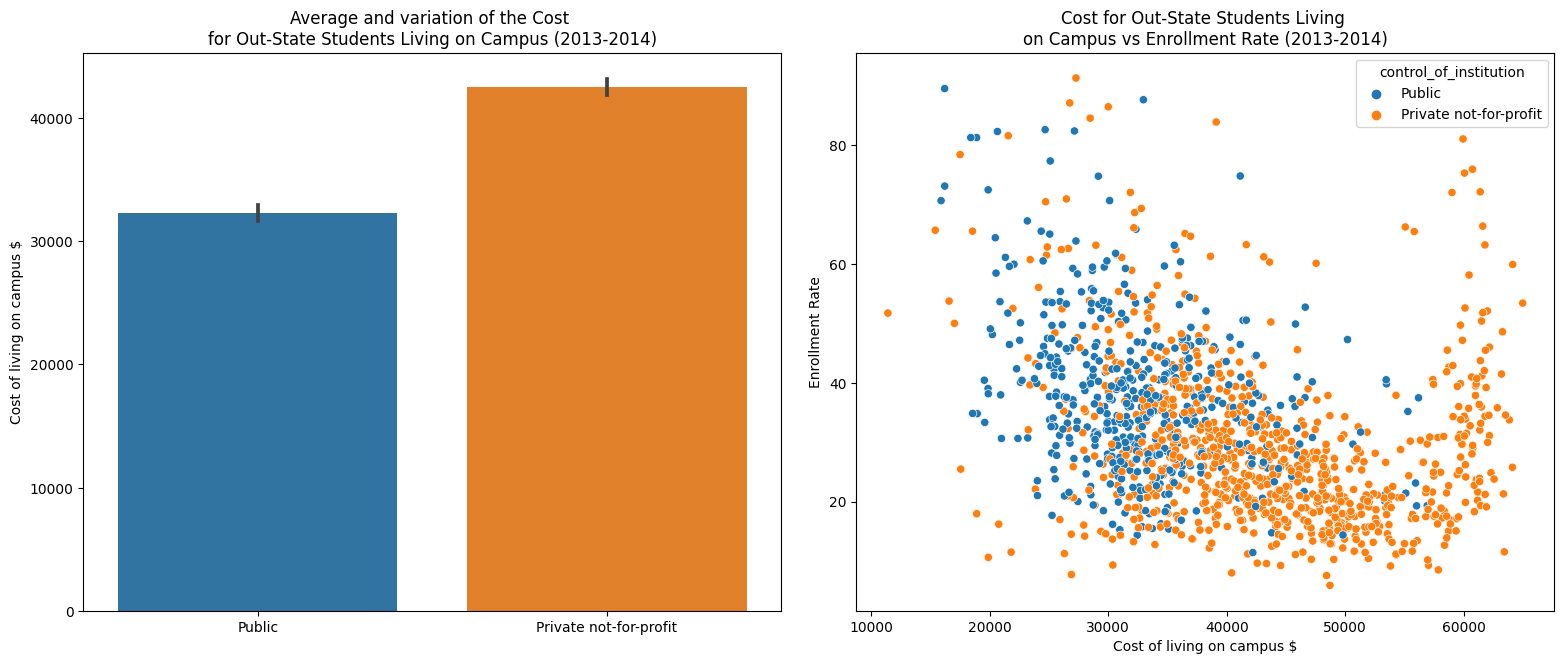

In [63]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(y=df.total_price_for_out_of_state_students_living_on_campus_2013_14,x=df.control_of_institution)
plt.title('''Average and variation of the Cost 
for Out-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.subplot(1,2,2)
sns.scatterplot(x=df.total_price_for_out_of_state_students_living_on_campus_2013_14,y=df.enrollment_rate,hue=df.control_of_institution);
plt.title('''Cost for Out-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)

En el caso de los estudiantes de otros estados, el costo promedio de vida en el campus es también menor en las universidades públicas.
En el caso del segundo gráfico, llegamos a la misma conclusión que para los estudiantes del mismo estado: los estudiantes prefieren universidades con costos de vida en el campus más bajos.